<a href="https://colab.research.google.com/github/Econ-Yonsei/Time-series/blob/master/EX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
install.packages('forecast')
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [5]:
AirPassengers
data=AirPassengers

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


12개월 주기로 반복된다.

1년 단위의 계절성 발생. <계절성>

추세가 존재함. <추세 존재>

분산이 시간이 지남에 따라 증가함. <분산 안정화>

SARMIA 필요.

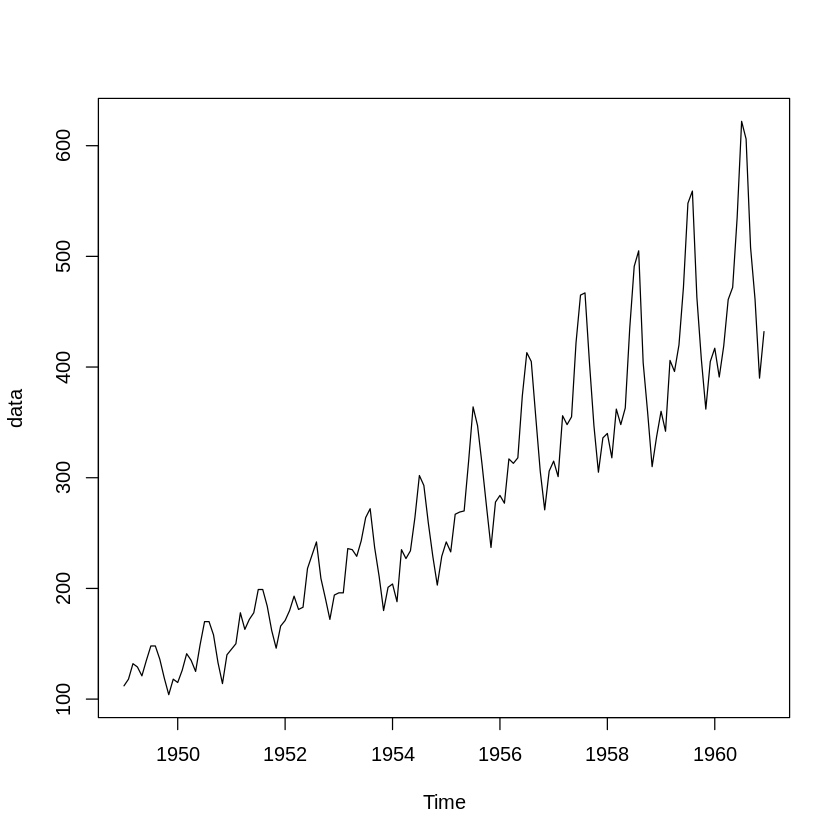

In [6]:
plot(data) 

각 Component들을 통해 확인해볼 수 있음.
분해를 통해 확인할 수 있음.

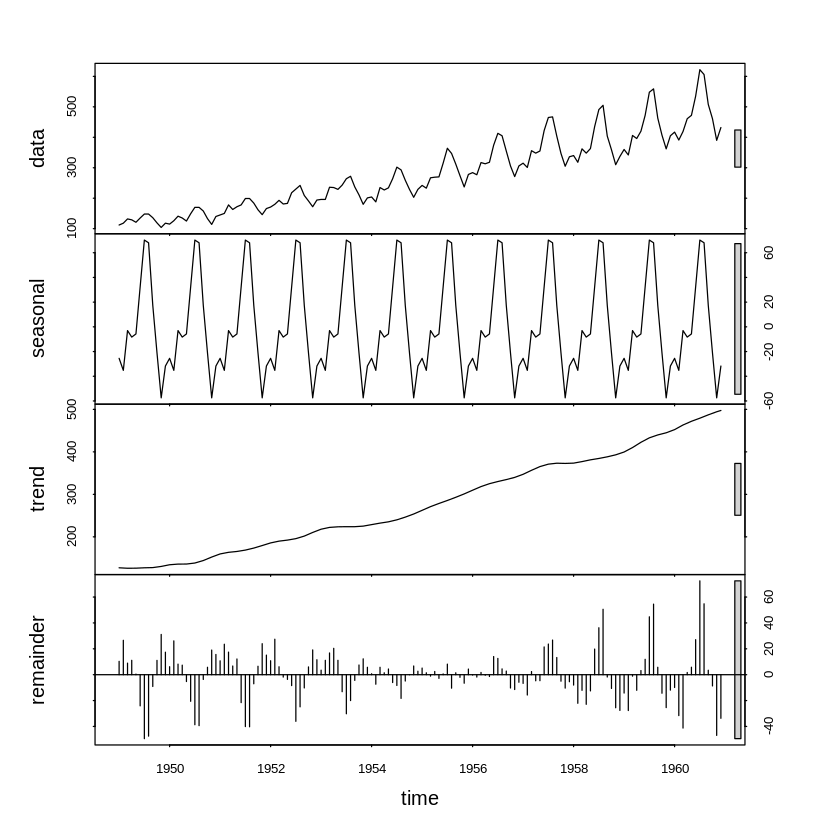

In [7]:
plot(stl(AirPassengers, s.window='periodic'))

분산안정화를 위해 Log Transformation

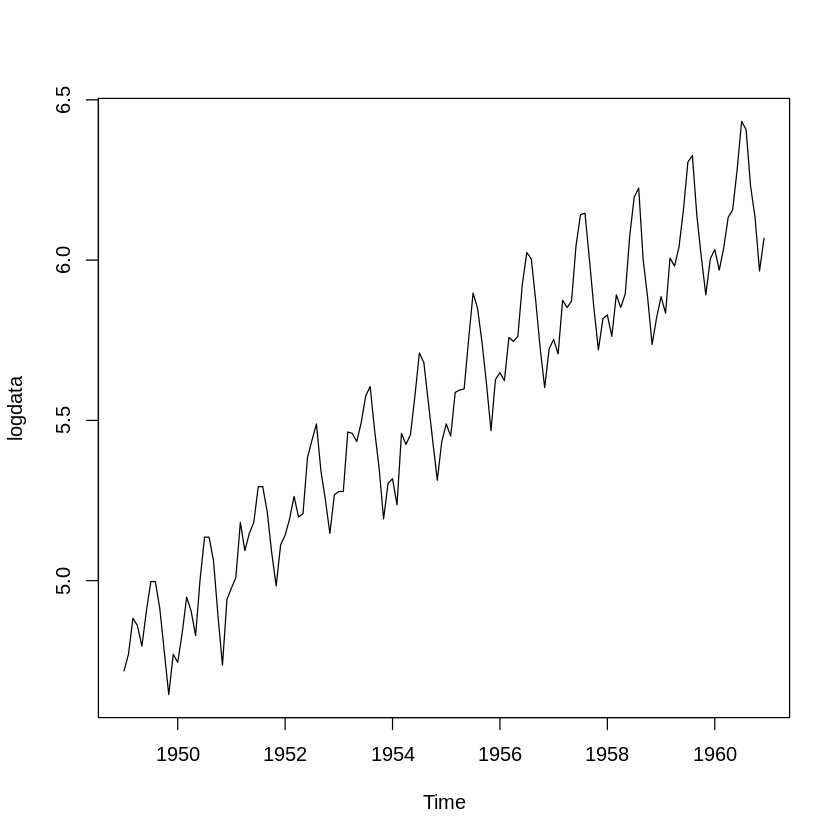

In [9]:
logdata<-log(data)
plot(logdata)

차분을 통해 추세 제거 (1차 차분)

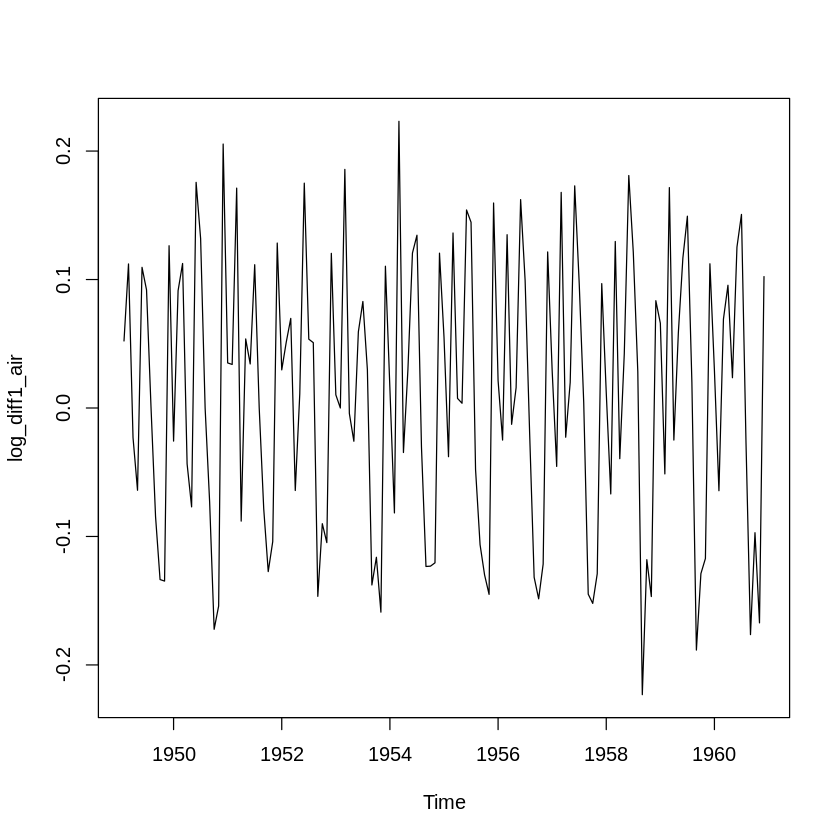

In [11]:
log_diff1_air<-diff(logdata,1)
plot(log_diff1_air)

계절성 제거 <계절차분시도>

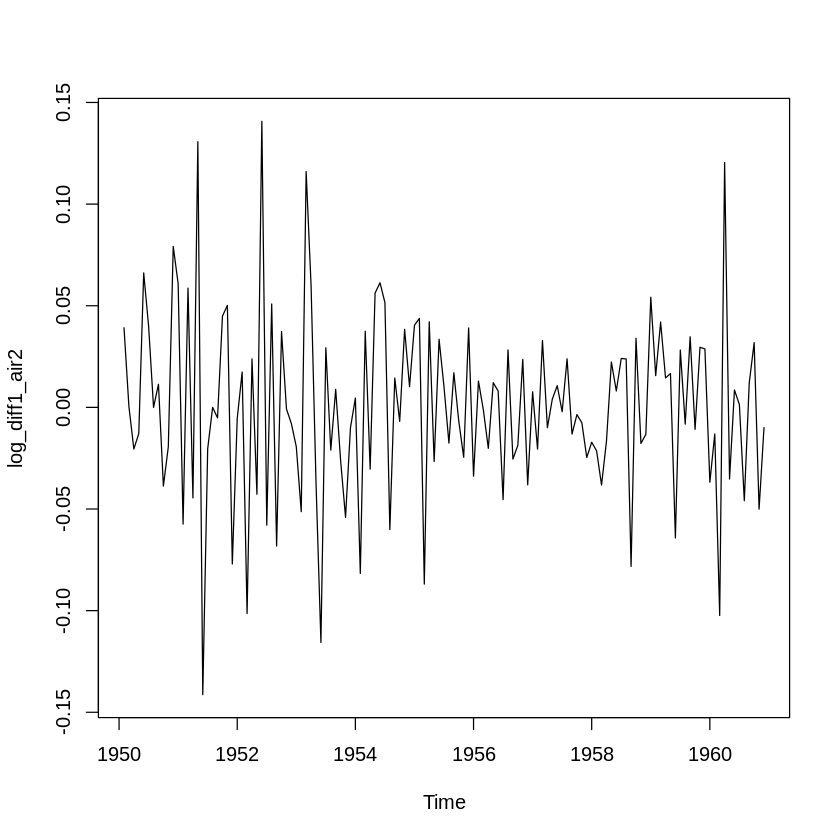

In [12]:
log_diff1_air2<-diff(log_diff1_air, lag=12)
plot(log_diff1_air2)
#Unit root test-> check the data is stationary

모형 식별 (ACF, PACF 확인)

SARMIA(p,d,q) X (P,D,Q)_{12}

d=D=1

후보모형

AR(1)
MA(1)
ARMA(1,1)

(P,D,Q)->주기만 확인할 것(,412,24,36,48....)

MA(1)_{12}

Warning message in par(mrow = c(2, 1)):
“"mrow" is not a graphical parameter”


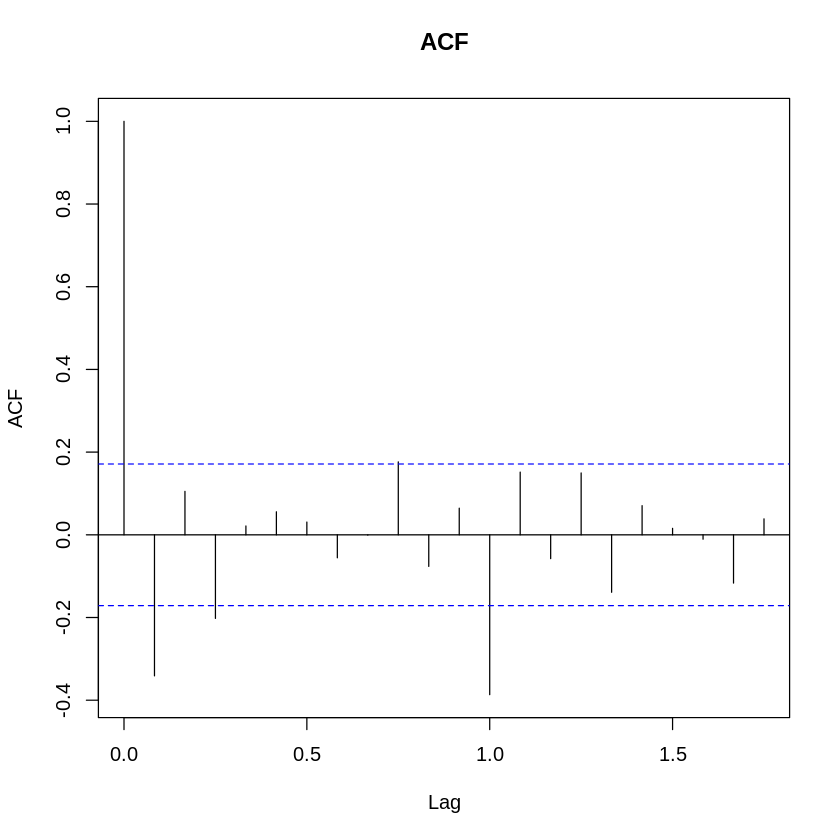

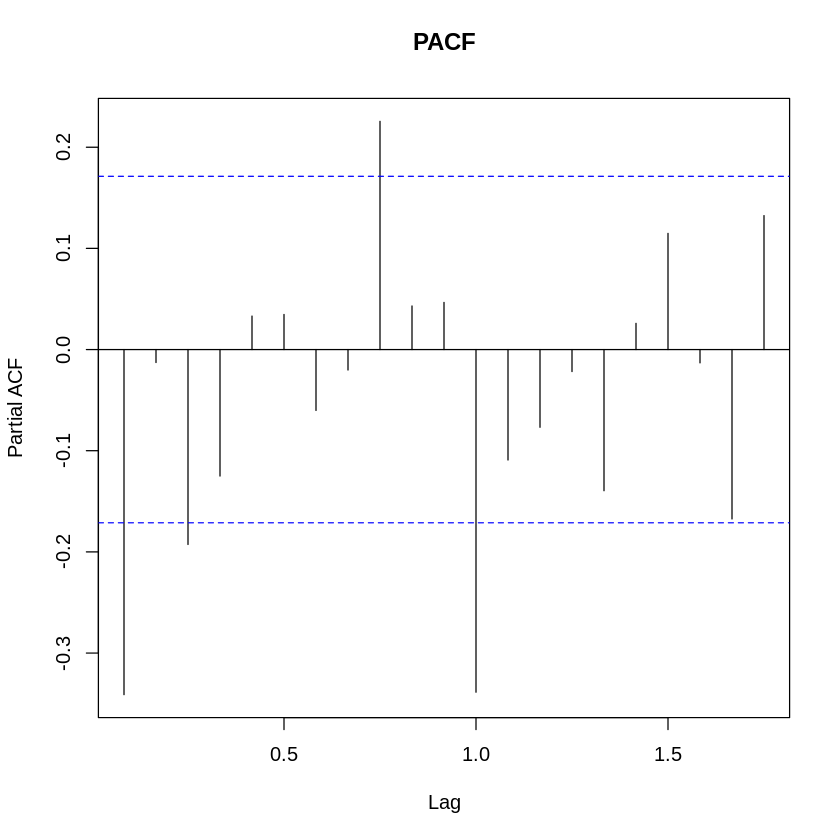

In [13]:
par(mrow=c(2,1))
acf(log_diff1_air2, main='ACF')
pacf(log_diff1_air2, main='PACF')

모수 추정하기 (aic 주목하기)

auto.arima를 이용하여 후보모형 설정이 가능함.

In [18]:
auto.arima(log_diff1_air2)

Series: log_diff1_air2 
ARIMA(0,0,1)(0,0,1)[12] with zero mean 

Coefficients:
          ma1     sma1
      -0.4018  -0.5569
s.e.   0.0896   0.0731

sigma^2 estimated as 0.001369:  log likelihood=244.7
AIC=-483.39   AICc=-483.2   BIC=-474.77

모수 추정하기 (aic 주목하기)

In [21]:
fit1<-arima(logdata, c(0,1,1),seasonal = list(order=c(0,1,1), period = 12))
fit2<-arima(logdata, c(1,1,1),seasonal = list(order=c(0,1,1), period = 12))
fit3<-arima(logdata, c(1,1,0),seasonal = list(order=c(0,1,1), period = 12))
fit1 #Choose it SARIMA(0,1,1)X(0,1,1)_{12}
fit2 
fit3


Call:
arima(x = logdata, order = c(0, 1, 1), seasonal = list(order = c(0, 1, 1), period = 12))

Coefficients:
          ma1     sma1
      -0.4018  -0.5569
s.e.   0.0896   0.0731

sigma^2 estimated as 0.001348:  log likelihood = 244.7,  aic = -483.4


Call:
arima(x = logdata, order = c(1, 1, 1), seasonal = list(order = c(0, 1, 1), period = 12))

Coefficients:
         ar1      ma1     sma1
      0.1960  -0.5784  -0.5643
s.e.  0.2475   0.2132   0.0747

sigma^2 estimated as 0.001341:  log likelihood = 244.95,  aic = -481.9


Call:
arima(x = logdata, order = c(1, 1, 0), seasonal = list(order = c(0, 1, 1), period = 12))

Coefficients:
          ar1     sma1
      -0.3395  -0.5619
s.e.   0.0822   0.0748

sigma^2 estimated as 0.001367:  log likelihood = 243.74,  aic = -481.49

모형 진단하기 

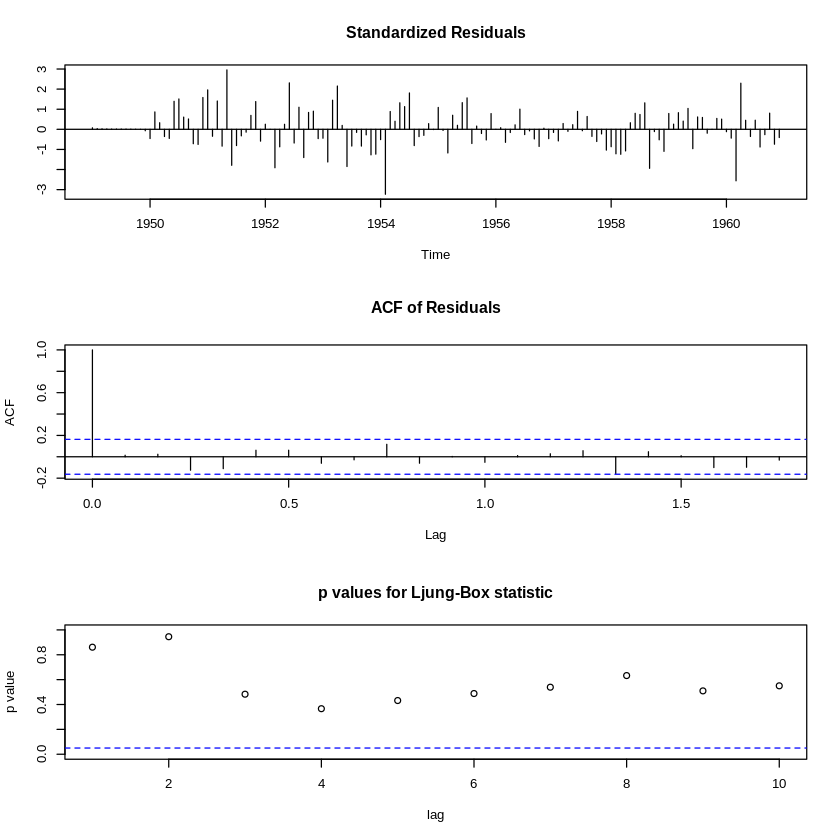

In [22]:
tsdiag(fit1) #Ljung-BOx statistic -> WN characteristics satisfied

Forecasting

log transformation, differencing 등 많은 작업이 이루어져 Data scale이 작아짐

In [24]:
pred<-predict(fit1, n.ahead = 10* 12) #n.ahead->10년치 12개월 주기로 추정 (120 달 추정)
pred

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1961,6.110186,6.053775,6.171715,6.199300,6.232556,6.368779,6.507294,6.502906,6.324698,6.209008,6.063487,6.168025
1962,6.206435,6.150025,6.267964,6.295550,6.328805,6.465028,6.603543,6.599156,6.420947,6.305257,6.159737,6.264274
1963,6.302684,6.246274,6.364213,6.391799,6.425054,6.561277,6.699792,6.695405,6.517197,6.401507,6.255986,6.360523
1964,6.398933,6.342523,6.460463,6.488048,6.521304,6.657526,6.796042,6.791654,6.613446,6.497756,6.352235,6.456773
1965,6.495183,6.438772,6.556712,6.584297,6.617553,6.753776,6.892291,6.887903,6.709695,6.594005,6.448484,6.553022
1966,6.591432,6.535022,6.652961,6.680547,6.713802,6.850025,6.988540,6.984153,6.805944,6.690254,6.544734,6.649271
1967,6.687681,6.631271,6.749210,6.776796,6.810051,6.946274,7.084789,7.080402,6.902194,6.786504,6.640983,6.745520
1968,6.783930,6.727520,6.845460,6.873045,6.906301,7.042523,7.181039,7.176651,6.998443,6.882753,6.737232,6.841770
1969,6.880180,6.823769,6.941709,6.969294,7.002550,7.138773,7.277288,7.272900,7.094692,6.979002,6.833481,6.938019
1970,6.976429,6.920019,7.037958,7.065544,7.098799,7.235022,7.373537,7.369150,7.190941,7.075251,6.929731,7.034268


모형 분석을 위해 Raw data를 Stationary하게 바꿈(분산 안정화, log transformation....etc) 그러므로 예측 데이터를 다시 지수를 취해줌으로써 Raw data의 실제 예측값으로 다시 적용시킴.

분산이 시간에 따라 커지는 것

추세

계절성

ARMIA모형은 과거 Raw data의 위 세가지 요소를 모두 반영하여 예측을 했음.
단기 예측에서 ARIMA 모형이 많이 쓰임.

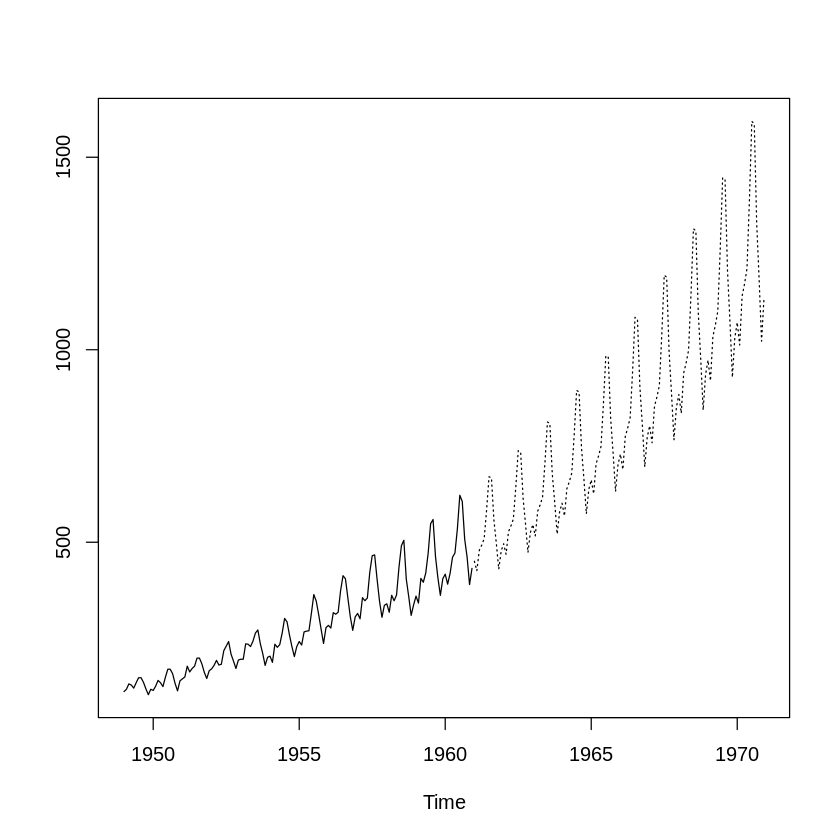

In [25]:
ts.plot(AirPassengers, exp(pred$pred), lty=c(1,3))